# Getting Started

### Import modules

In [1]:
from pyosrd.osrd import OSRD
from pyosrd.schedules import Schedule, schedule_from_osrd

# Import two CpAgents :
from cpagent.ortools_agent.cp_agent import CpAgent

## Load a premade simulation with delay

In [2]:
agent = CpAgent("cp_agent")
agent.allow_change_order = True

agent.load_scenario("c2y1y2y_2_trains_reorder")

[15:09:02,265] [INFO]  [StandaloneSimulationCommand] Loading infra: tmp/infra.json
[15:09:02,298] [INFO]              [FullInfra] parsing infra
[15:09:02,370] [INFO]              [FullInfra] adaptation to kotlin
[15:09:02,400] [INFO]              [FullInfra] loading signals
[15:09:02,408] [INFO]              [FullInfra] building blocks
[15:09:02,413] [INFO]  [StandaloneSimulationCommand] Loading input: tmp/simulation.json
[15:09:02,570] [INFO]  [StandaloneSimulationCommand] Running simulation for schedule group: group.0
[15:09:02,661] [INFO]  [StandaloneSimulationCommand] Running simulation for schedule group: group.1
[15:09:02,670] [INFO]  [StandaloneSimulationCommand] All simulations completed
[15:09:02,670] [INFO]  [StandaloneSimulationCommand] Saving results at: tmp/results.json
[15:09:02,954] [INFO]  [StandaloneSimulationCommand] Loading infra: tmp/infra.json
[15:09:02,982] [INFO]              [FullInfra] parsing infra
[15:09:03,063] [INFO]              [FullInfra] adaptation to k

### Visualize use case infra

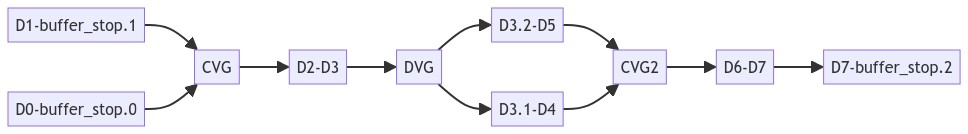

In [3]:
agent.delayed_schedule.draw_graph()

### Visualize use case delayed schedule

<Axes: xlabel='Time'>

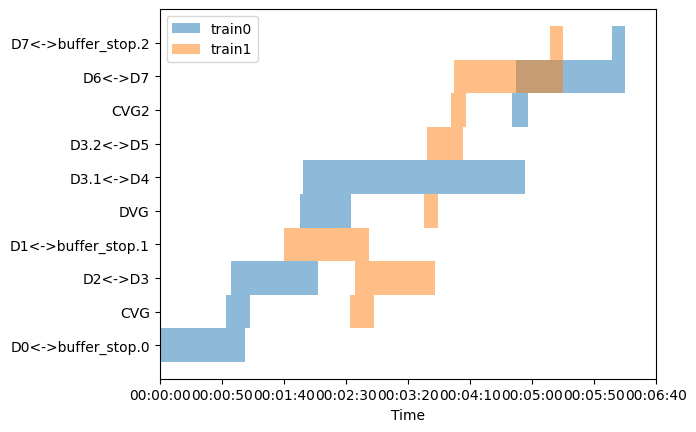

In [4]:
agent.delayed_schedule.plot()

### Visualize use case regulated schedule

/home/simon/dev/python/cpagent/src/cpagent/osrd_adapter.py:134: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  and fixed_durations.loc[zone][train_idx])
/home/simon/dev/python/cpagent/src/cpagent/osrd_adapter.py:134: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  and fixed_durations.loc[zone][train_idx])
/home/simon/dev/python/cpagent/src/cpagent/osrd_adapter.py:134: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  and fixed_durations.lo

<Axes: xlabel='Time'>

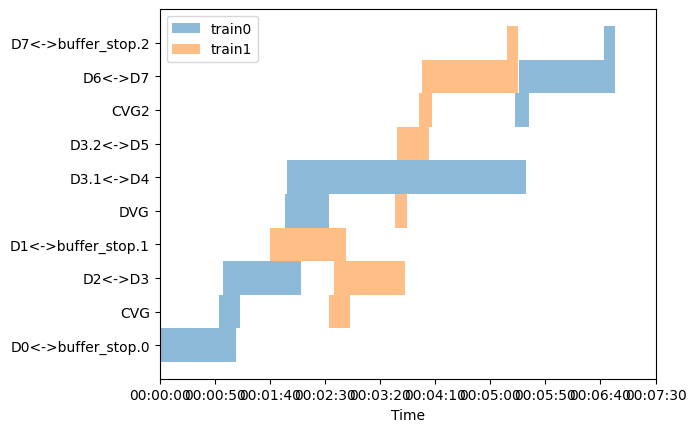

In [5]:
agent.regulated_schedule.plot()

## Load a simulation and add delays

In [6]:
# Load an OSRD use case
ref = OSRD(simulation='station_capacity2', dir='tmp')
# Clear the tmp delays
ref.reset_delays()
# Add a new delay to the use case
ref.add_delay('train0', time_threshold=100, delay=285.)
delayed = ref.delayed()

[15:09:05,188] [INFO]  [StandaloneSimulationCommand] Loading infra: tmp/infra.json
[15:09:05,227] [INFO]              [FullInfra] parsing infra
[15:09:05,292] [INFO]              [FullInfra] adaptation to kotlin
[15:09:05,321] [INFO]              [FullInfra] loading signals
[15:09:05,325] [INFO]              [FullInfra] building blocks
[15:09:05,330] [INFO]  [StandaloneSimulationCommand] Loading input: tmp/simulation.json
[15:09:05,487] [INFO]  [StandaloneSimulationCommand] Running simulation for schedule group: group.2
[15:09:05,566] [INFO]  [StandaloneSimulationCommand] Running simulation for schedule group: group.3
[15:09:05,575] [INFO]  [StandaloneSimulationCommand] All simulations completed
[15:09:05,576] [INFO]  [StandaloneSimulationCommand] Saving results at: tmp/results.json


### Visualize use case

In [7]:
# Convert the simulation in a format more suitable for visualization
delayed_schedule = schedule_from_osrd(delayed)

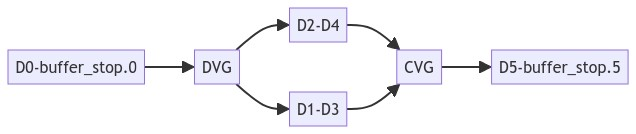

In [8]:
# Draw the infrastructure
delayed_schedule.draw_graph()

<Axes: xlabel='Time'>

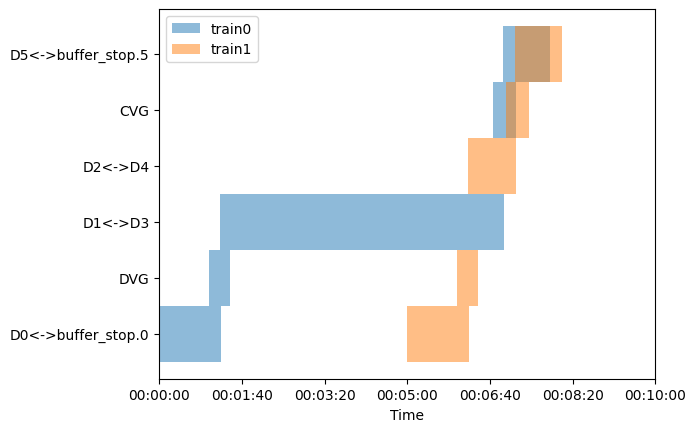

In [9]:
# Plot the space/time graph
delayed_schedule.plot()

### Compute an optimal regulation using OrtoolsAgent

In [10]:
ortools_regulated = ref.regulate(agent=CpAgent("ortools_agent"))
ortools_regulated_schedule = schedule_from_osrd(ortools_regulated)

/home/simon/dev/python/cpagent/src/cpagent/osrd_adapter.py:134: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  and fixed_durations.loc[zone][train_idx])
/home/simon/dev/python/cpagent/src/cpagent/osrd_adapter.py:134: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  and fixed_durations.loc[zone][train_idx])
/home/simon/dev/python/cpagent/src/cpagent/osrd_adapter.py:134: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  and fixed_durations.lo

[15:09:07,023] [INFO]  [StandaloneSimulationCommand] Loading infra: tmp/infra.json
[15:09:07,050] [INFO]              [FullInfra] parsing infra
[15:09:07,115] [INFO]              [FullInfra] adaptation to kotlin
[15:09:07,159] [INFO]              [FullInfra] loading signals
[15:09:07,164] [INFO]              [FullInfra] building blocks
[15:09:07,172] [INFO]  [StandaloneSimulationCommand] Loading input: tmp/delayed/ortools_agent/simulation.json
[15:09:07,323] [INFO]  [StandaloneSimulationCommand] Running simulation for schedule group: group.2
[15:09:07,411] [INFO]  [StandaloneSimulationCommand] Running simulation for schedule group: group.3
[15:09:07,424] [INFO]  [StandaloneSimulationCommand] All simulations completed
[15:09:07,425] [INFO]  [StandaloneSimulationCommand] Saving results at: tmp/delayed/ortools_agent/results.json


<Axes: xlabel='Time'>

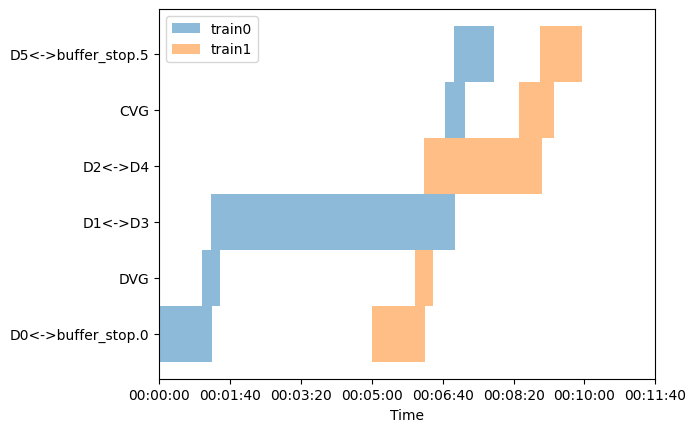

In [11]:
# Plot the space/time graph
ortools_regulated_schedule.plot()

### 